In [65]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

Loading data

In [15]:
mnist = fetch_openml('mnist_784')

Assigning features and labels

In [16]:
X,y=mnist['data'],mnist['target']

Splitting into train/test datasets

In [17]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]
X_train,X_test,y_train,y_test=X_train.to_numpy(),X_test.to_numpy(),y_train.to_numpy(),y_test.to_numpy()

#### Plotting/dataset visualisation

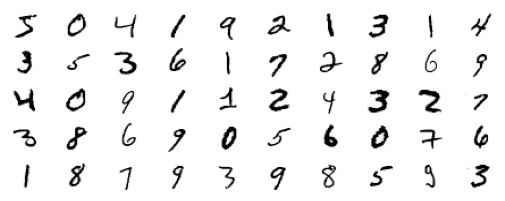

In [18]:
def plot_digits(data, row_size=5):
    for i in range(len(data)):
        ax=plt.subplot(row_size,row_size,i+1)
        digit=data[i]
        digit_image=digit.reshape(28,28)
        plt.imshow(digit_image,cmap=plt.cm.Grays)
        plt.axis('off')
plot_digits(X_train[:50],row_size=10)
plt.show()

Reducing sorting bias

In [19]:
shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

Scaling data

In [21]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled=scaler.fit_transform(X_test.astype(np.float64))

Selecting classifier

In [90]:
classifier=KNeighborsClassifier()

In [91]:
classifier.fit(X_train_scaled,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Checking classifier scoring

In [26]:
cross_val_score(classifier,X_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.94   , 0.942  , 0.94455])

Creating confusion matrix

In [ ]:
y_train_pred=cross_val_predict(classifier,X_train_scaled,y_train,cv=3)
cf_matrix=confusion_matrix(y_train,y_train_pred)

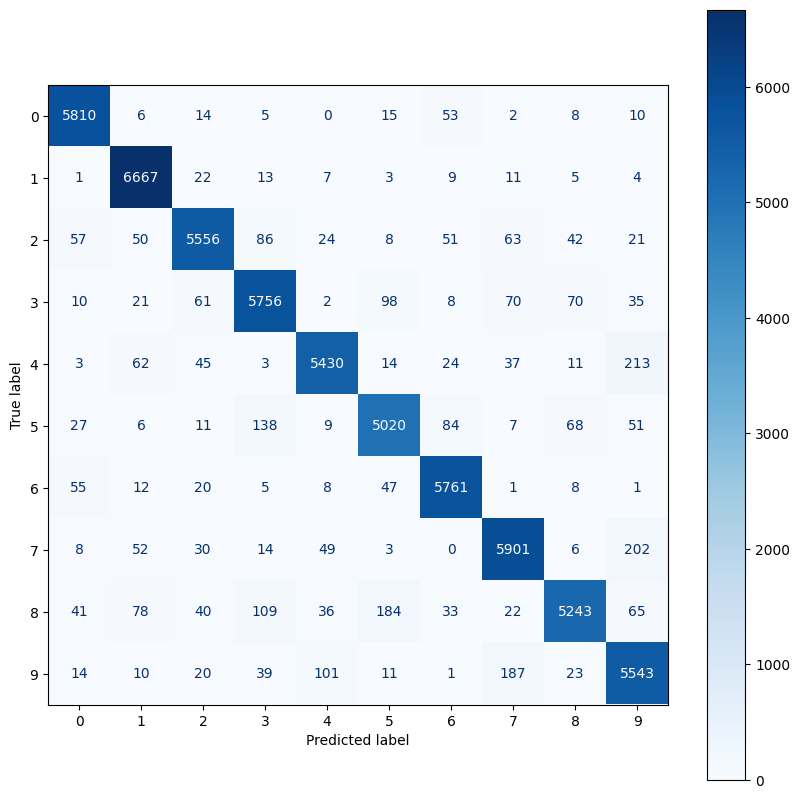

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
cf_matrix_display = ConfusionMatrixDisplay(cf_matrix)
cf_matrix_display.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

Fine tuning model

In [27]:
param_grid={
    'n_neighbors':[3,5,7,9],
    'weights':['uniform','distance'],
}

In [29]:
grid_search=GridSearchCV(classifier,param_grid,cv=5)

In [30]:
grid_search.fit(X_train_scaled,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [31]:
grid_search.best_params_['n_neighbors']

3

In [84]:
classifier_finetuned=KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],weights=grid_search.best_params_['weights'])

In [85]:
classifier_finetuned.fit(X_train_scaled,y_train)

,n_neighbors,3
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [86]:
cross_val_score(classifier_finetuned,X_test_scaled,y_test,cv=3,scoring='accuracy')

array([0.87762448, 0.90669067, 0.91749175])

In [93]:
def class_report(y, y_predictions):
    print("\nClassification report:\n\n",
          classification_report(y, y_predictions))

In [94]:
y_test_preds=classifier_finetuned.predict(X_test_scaled)

In [95]:
class_report(y_test,y_test_preds)


Classification report:

               precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.99      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.93      0.95      0.94      1010
           4       0.95      0.94      0.95       982
           5       0.93      0.93      0.93       892
           6       0.96      0.97      0.97       958
           7       0.93      0.93      0.93      1028
           8       0.95      0.91      0.93       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000

